<a href="https://colab.research.google.com/github/JeffersonBP/Aula6Analise-de-sentimentos/blob/main/Trabalho_jefferson_Batista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#packages
!pip install unidecode
!pip install fraction
!pip instalar pandas
! pip instalar


# Load EDA Pkgs
import pandas as pd
import numpy as np
import random

# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')

#charts & others stuff
from unidecode import unidecode
import matplotlib.pyplot as plt
import re
import string
from fractions import Fraction



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "instalar" - maybe you meant "install"
ERROR: unknown command "instalar" - maybe you meant "install"


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


,TITULO,TEXTO,DATA,AUTOR
0,É falso que One7 é a empresa que administra ca...,Postagens que circulam nas redes sociais engan...,"31 de maio de 2022, 18h48",Por Luiz Fernando Menezes
1,Não é verdade que Bolsonaro disse que idosos f...,É falso que o presidente Jair Bolsonaro (PL) d...,"1 de junho de 2022, 15h08",Por Luiz Fernando Menezes
2,Peritos da PF não provaram no STF que urnas sã...,É falso que peritos da PF (Polícia Federal) pr...,"1 de junho de 2022, 16h45",Por Marco Faustino
3,Vaias ouvidas em vídeo foram direcionadas a ou...,Não é verdade que o presidente Jair Bolsonaro ...,"30 de maio de 2022, 13h34",Por Priscila Pacheco
4,Vídeo em que pessoas dançam com laser preso ao...,Não mostra um trabalho de estudantes de sociol...,"2 de junho de 2022, 18h15",Por Priscila Pacheco
...,...,...,...,...
2215,É falso que Lula disse no Twitter que bolsonar...,Não é verdade que o ex-presidente Luiz Inácio ...,"7 de junho de 2022, 15h30",Por Luiz Fernando Menezes
2216,É falso que foto mostra Bolsonaro em campanha ...,Uma foto de 2014 que mostra o presidente Jair ...,"11 de maio de 2022, 18h17",Por Priscila Pacheco
2217,Ações militares mostradas em vídeo não são de ...,Uma compilação de vídeos que circula nas redes...,"5 de maio de 2022, 18h05",Por Luiz Fernando Menezes
2218,Vídeo mostra ato bolsonarista em ponte no ES n...,Não foi gravado no dia 1º de maio de 2022 um v...,"5 de maio de 2022, 16h10",Por Priscila Pacheco


(2220, 4)

TITULO    object
TEXTO     object
DATA      object
AUTOR     object
dtype: object

TITULO    2220
TEXTO     2194
DATA      2220
AUTOR     2220
dtype: int64
TITULO    2194
TEXTO     2194
DATA      2194
AUTOR     2194
dtype: int64


Por Luiz Fernando Menezes                                                 919
Por Marco Faustino                                                        358
Por Priscila Pacheco                                                      341
Por Amanda Ribeiro                                                        126
Por Bernardo Moura                                                         59
                                                                         ... 
Por Bernardo Moura e Judite Cypreste                                        1
Por Tai Nalon, Ana Rita Cunha, Bárbara Libório e Luiz Fernando Menezes      1
Por Alexandre Aragão e Luiz Fernando Menezes                                1
Por Judite Cypreste e Luiz Fernando Menezes                                 1
Por Priscila Pacheco e Amanda Ribeiro                                       1
Name: AUTOR, Length: 107, dtype: int64

,TITULO,TEXTO,DATA,AUTOR
0,É falso que One7 é a empresa que administra ca...,Postagens que circulam nas redes sociais engan...,"31 de maio de 2022, 18h48",Por Luiz Fernando Menezes
1,Não é verdade que Bolsonaro disse que idosos f...,É falso que o presidente Jair Bolsonaro (PL) d...,"1 de junho de 2022, 15h08",Por Luiz Fernando Menezes
5,Não é verdade que testes de Covid-19 podem ati...,"Não é verdade que os testes do tipo RT-PCR, us...","3 de junho de 2022, 18h53",Por Luiz Fernando Menezes
7,Johnny Depp não disse ao ‘The New York Times’ ...,É falso que Johnny Depp defendeu a reeleição d...,"2 de junho de 2022, 16h16",Por Luiz Fernando Menezes
10,Posts sobre ‘resumo do mês’ de Bolsonaro mostr...,Três fotos que mostram atos de apoio ao presid...,"6 de junho de 2022, 16h16",Por Luiz Fernando Menezes
...,...,...,...,...
2204,É falso que Zeca Pagodinho recebeu R$ 2 milhõe...,Postagens que circulam nas redes sociais engan...,"5 de maio de 2022, 18h43",Por Luiz Fernando Menezes
2206,Não é verdade que vídeo mostra xingamentos a L...,É falso que o vídeo em que pessoas cantam “Lul...,"6 de maio de 2022, 16h48",Por Luiz Fernando Menezes
2211,Vídeo de Lula na Unicamp é editado para fazer ...,É uma montagem o vídeo que mostra a chegada do...,"10 de maio de 2022, 17h16",Por Luiz Fernando Menezes
2215,É falso que Lula disse no Twitter que bolsonar...,Não é verdade que o ex-presidente Luiz Inácio ...,"7 de junho de 2022, 15h30",Por Luiz Fernando Menezes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


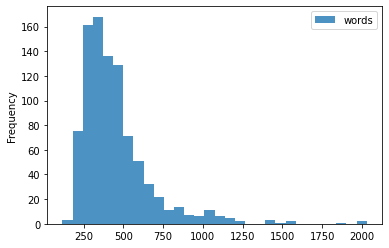

In [ ]:

import urllib.request  
texto1 = []


import pandas as pd
pd_texto = pd.read_csv('https://raw.githubusercontent.com/JeffersonBP/Aula3Scrapy/main/Aranha0052.csv')

#estudo do meu data frame 
display(pd_texto)
display(pd_texto.shape)
display(pd_texto.dtypes)

# verifico que minha aranha  não consegiu coletar todos os textos 
print(pd_texto.count()) 
# Elimina todos os valores nulos ou seja informações que não consegui capturar com minha aranha 
df_texto = pd_texto.dropna()

# verifico se consegui realizar o que pretendia 
print(df_texto.count())
# Queria descobrir quantos Autores diferentes eu tinha. encontrei 107 
qt_autor = df_texto['AUTOR'].value_counts()
display(qt_autor)
#Separa um DF de teste com os textos puplicados pelo professor Luiz Fernando Menezes logo depois dou um diplay para confirma. 
df_prof= df_texto.loc[df_texto['AUTOR']=='Por Luiz Fernando Menezes']
display(df_prof)

#Faz a contagem de palavras por cada linha dos textos coletados
df_prof['words'] = df_prof['TEXTO'].str.split().str.len()

##Elimina qualquer texto que tenha gerado menos de 100 palavras não estarei utilizando 
#pd_texto = pd_texto.loc[(pd_texto['words'] > 100)]

#Plota o DataFrame em histograma para uma avaliação
df_prof.plot.hist(bins=30, alpha=0.8)

      


In [ ]:

stop = stopwords.words('portuguese')
# stop.append('nao')
stop2 = list()
for word in stop:
  stop2.append(unidecode(word))
  
stemmer = nltk.stem.RSLPStemmer()

# remoção de palavras de parada
df_texto['TEXTO_treated'] = df_texto['TEXTO'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_prof['TEXTO_treated'] = df_prof['TEXTO'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#FAzendo Steammer
# df['content_treated'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# df_aj['content_treated'] = df_aj['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# df_ver['content_treated'] = df_ver['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

#Transforma em minuscula e remoção de acentos 
df_texto['TEXTO_treated'] = df_texto['TEXTO_treated'].str.lower().apply(lambda x: unidecode(x))
df_prof['TEXTO_treated'] = df_prof['TEXTO_treated'].str.lower().apply(lambda x: unidecode(x))

# remocação de pontuaçao
df_texto['TEXTO_treated'] = df_texto['TEXTO_treated'].str.replace('[{}]'.format(string.punctuation), ' ')
df_prof['TEXTO_treated'] = df_prof['TEXTO_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

# remocação de numeros
df_texto['TEXTO_treated'] = df_texto['TEXTO_treated'].str.replace('[{}]'.format(string.digits), '')
df_prof['TEXTO_treated'] = df_prof['TEXTO_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada (repescagem)
df_texto['TEXTO_treated'] = df_texto['TEXTO_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))
df_prof['TEXTO_treated'] = df_prof['TEXTO_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6cfebfc50>,
      dtype=object)

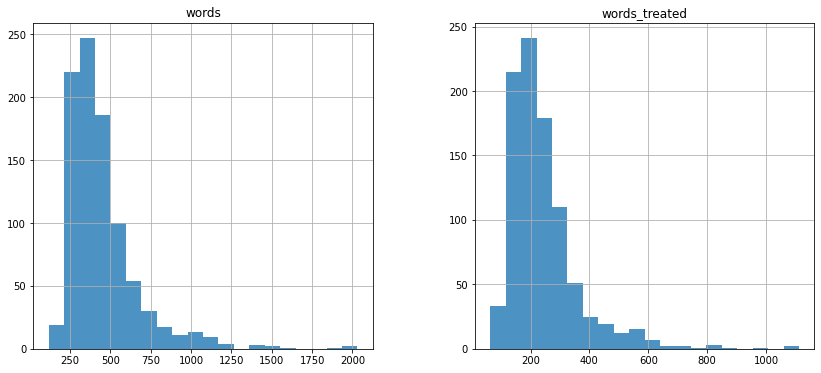

In [ ]:
#Plota o DataFrame em histograma para uma avaliação
#Faz a contagem de palavras por cada linha do artigo
df_prof['words_treated'] = df_prof['TEXTO_treated'].str.split().str.len()
#df_aj.plot();
df_prof.hist(bins=20, alpha=0.8, figsize=(14,6))
#df_aj.sample(10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

#Textos escritos pelo professor 
XAOSF = vectorizer.fit_transform(df_prof['TEXTO_treated'])
vocabulary_aosf = vectorizer.get_feature_names()
pdXAOSF = pd.DataFrame(data=XAOSF.toarray(), columns=vocabulary_aosf) #.iloc[:,0::2]

#Base de dados para comparação.  
XVER = vectorizer.fit_transform(df_texto['TEXTO_treated'])
vocabulary_ver = vectorizer.get_feature_names()
pdXVER = pd.DataFrame(data=XVER.toarray(), columns=vocabulary_ver) #.iloc[:,0::2]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(vocabulary_aosf)

['aantt', 'aas', 'ab', 'aba', 'ababa', 'abacate', 'abacaxi', 'abadiania', 'abaixo', 'abajo', 'abandonada', 'abandonado', 'abandonar', 'abandonaram', 'abandono', 'abandonou', 'abarca', 'abarcado', 'abarcar', 'abarcou', 'abas', 'abastece', 'abastecem', 'abastecendo', 'abastecidos', 'abastecimento', 'abater', 'abatida', 'abatido', 'abatimento', 'abbot', 'abc', 'abdelmassih', 'abdenur', 'abdominais', 'abdominal', 'abencoa', 'abencoado', 'aberracao', 'aberta', 'abertamente', 'abertas', 'aberto', 'abertos', 'abertura', 'abestado', 'abglt', 'abhh', 'abi', 'abic', 'ability', 'abin', 'abolida', 'abono', 'aborda', 'abordado', 'abordados', 'abordagem', 'abordam', 'abordar', 'abordaram', 'abordava', 'abordou', 'abortada', 'aborto', 'abortos', 'abraca', 'abracada', 'abracado', 'abraco', 'abracos', 'abraham', 'abrahao', 'abraji', 'abramo', 'abrange', 'abrangem', 'abrangencia', 'abrangente', 'abrangentes', 'abre', 'abrem', 'abreu', 'abriga', 'abrigados', 'abrigar', 'abrigo', 'abril', 'abrir', 'abrira

In [ ]:
len(vocabulary_aosf)
df_XAOSF = pdXAOSF.T
df_XAOSF['total_aosf'] = df_XAOSF.sum(axis=1) 

pdXAOSF

,aantt,aas,ab,aba,ababa,abacate,abacaxi,abadiania,abaixo,abajo,...,zona,zonas,zoologicos,zuckerberg,zumbi,zurique,zuritch,zuvic,zvi,zwi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
916,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
917,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# texto retirado de aos fatos 
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
df_XAOSF = pdXAOSF.T



#Calcula a quantidade de vezes que cada palavra é utilizada
df_XAOSF['total_aosf'] = df_XAOSF.sum(axis=1) 

#Remove as colunas individuais de cada documento para gerar a tabela
df_XAOSF.drop(df_XAOSF.columns[0:len(df_prof['TEXTO'])], axis=1, inplace=True)

#Ordena o resultado final

df_XAOSF = df_XAOSF.sort_values(by='total_aosf', ascending=False)

#Gera a tabela
df_XAOSF.head(30)

,total_aosf
redes,1855
sociais,1434
presidente,1297
feira,1266
publicacoes,1148
facebook,1132
desinformacao,1061
bolsonaro,1010
segundo,1008
sobre,1005


,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,present,not_present
redes,1,3,1,0,3,1,3,3,1,4,...,4,3,1,1,1,1,1,1,0.917301,0.081610
sociais,1,3,0,0,2,1,2,3,1,4,...,3,2,0,1,0,0,1,1,0.853101,0.145811
presidente,1,3,0,3,4,2,0,0,0,1,...,3,0,3,1,3,4,4,0,0.495103,0.503808
feira,1,1,0,1,1,1,1,2,0,1,...,1,1,1,1,3,4,1,1,0.849837,0.149075
publicacoes,0,0,2,1,2,1,0,1,2,0,...,1,1,0,1,1,1,3,0,0.701850,0.297062
facebook,1,1,1,2,2,1,1,2,1,1,...,1,1,2,1,1,1,1,2,0.931447,0.067465
desinformacao,1,1,2,0,4,0,1,1,0,2,...,1,1,0,1,1,0,1,0,0.647443,0.351469
bolsonaro,1,4,0,4,2,2,0,0,0,0,...,0,0,3,0,0,0,0,0,0.384113,0.614799
segundo,1,1,1,1,0,1,0,0,1,4,...,0,0,0,0,0,0,1,0,0.593036,0.405876
sobre,0,1,0,0,0,0,0,1,0,0,...,3,0,0,2,0,1,0,4,0.557127,0.441785


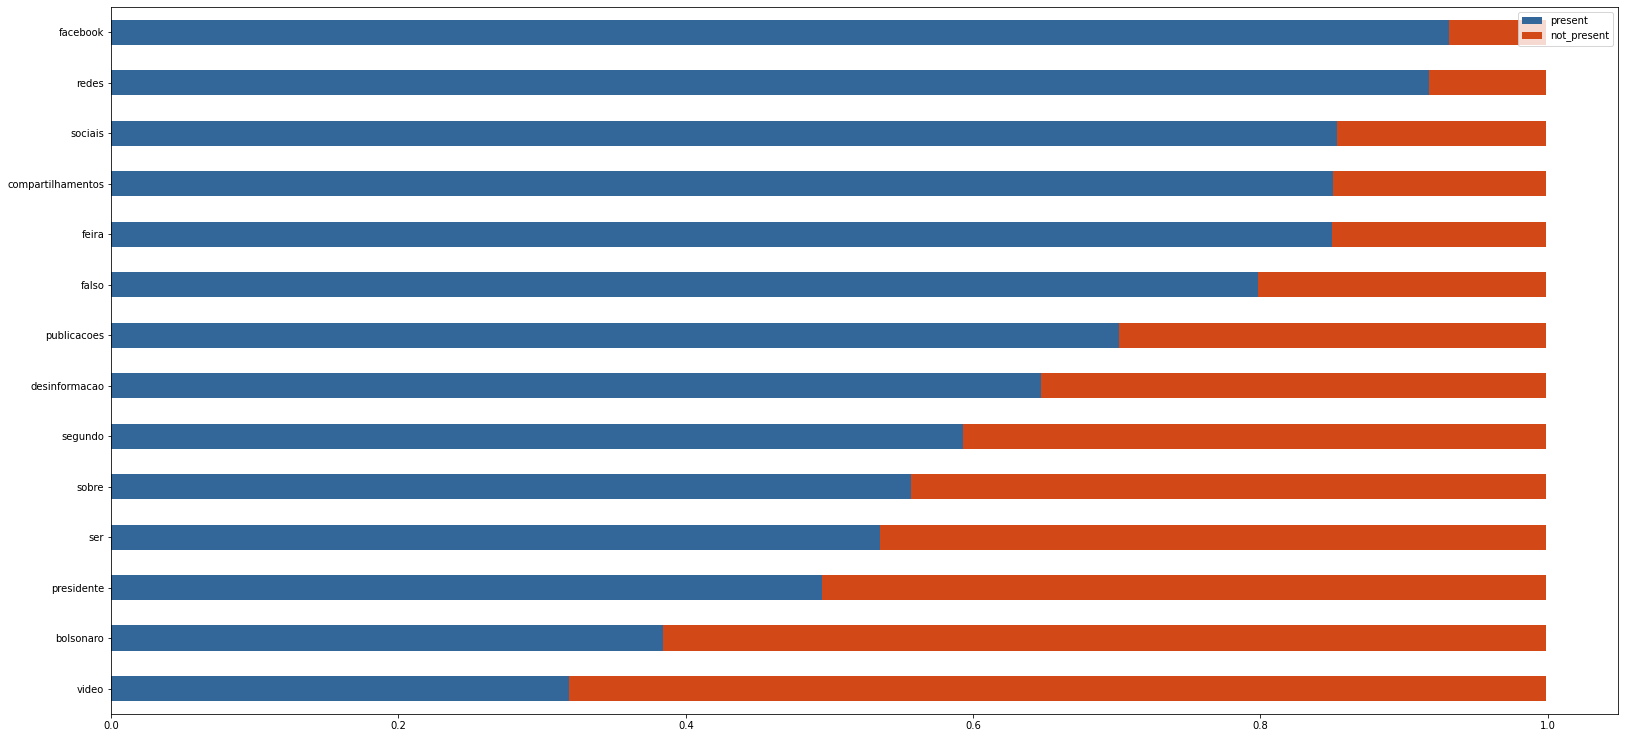

In [ ]:
# PROFssor 
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
#pdXAOSF = pdXAOSF.T
pdXAOSFT = pdXAOSF[['redes', 'sociais', 'presidente', 'feira', 'publicacoes', 'facebook', 'desinformacao', 'bolsonaro', 'segundo', 'sobre', 'video', 'falso', 'ser', 'compartilhamentos']].T

#Calcula a quantidade de documetnos que aquela palavra entrou ou nao entrou
pdXAOSFT['present'] = (pdXAOSFT.ne(0).sum(axis=1) -1) / len(df_prof['TEXTO'])
pdXAOSFT['not_present'] = pdXAOSFT.eq(0).sum(axis=1) / len(df_prof['TEXTO'])
display(pdXAOSFT)
#REmove as colunas individuais de cada documento para gerar o grafico
pdXAOSFT.drop(pdXAOSFT.columns[0:len(df_prof['TEXTO'])], axis=1, inplace=True)

#Ordena o resultado final
pdXAOSFT = pdXAOSFT.sort_values(by='present', ascending=True)

#Gera o gráfico contendo as 30 palavras mais usadas
pdXAOSFT.tail(30).plot.barh(stacked=True, color=['#336699', '#D34817'], figsize=(27,13))

In [ ]:
n_words = 30
pdXAOSFT.tail(n_words)

,present,not_present
video,0.318825,0.680087
bolsonaro,0.384113,0.614799
presidente,0.495103,0.503808
ser,0.535365,0.463547
sobre,0.557127,0.441785
segundo,0.593036,0.405876
desinformacao,0.647443,0.351469
publicacoes,0.701850,0.297062
falso,0.798694,0.200218
feira,0.849837,0.149075


,facebook,redes,sociais,compartilhamentos,feira,ferramenta,falso,referencias,selo,verificacao,...,sido,tarde,presidente,peca,entanto,dia,mil,circula,postagens,present
0,1,1,1,1,1,0,0,1,0,0,...,0,0,1,1,0,0,2,0,2,0.533333
1,1,3,3,1,1,0,1,1,0,0,...,1,0,3,1,0,0,0,0,1,0.500000
2,1,1,0,0,0,0,0,1,0,0,...,1,0,0,2,1,1,2,0,2,0.466667
3,2,0,0,1,1,0,1,1,0,0,...,0,0,3,0,1,0,1,0,2,0.466667
4,2,3,2,2,1,0,0,1,0,0,...,0,0,4,2,1,6,1,0,1,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,1,1,0,0,1,0,0,...,0,0,1,5,1,0,2,1,1,0.566667
915,1,1,0,1,3,0,2,1,0,0,...,1,0,3,0,1,2,1,0,1,0.533333
916,1,1,0,1,4,0,0,1,0,0,...,0,2,4,0,0,0,2,1,0,0.433333
917,1,1,1,1,1,0,1,1,1,1,...,0,0,4,1,0,0,1,0,2,0.600000


,present
0,0.533333
1,0.500000
2,0.466667
3,0.466667
4,0.466667
...,...
914,0.566667
915,0.533333
916,0.433333
917,0.600000


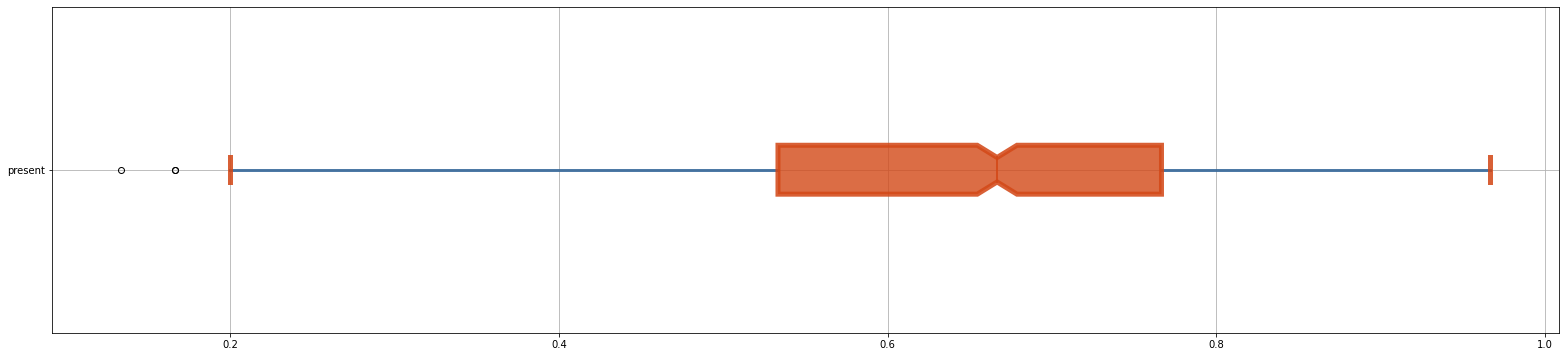

In [ ]:
#Reinicia a matriz transposta
pdXAOSFT = pdXAOSF.T

#Recalcula tudo (para evitar problemas como ordem de exceução das celulas)
pdXAOSFT['present'] = (pdXAOSFT.ne(0).sum(axis=1) -1) / len(df_prof['TEXTO'])
pdXAOSFT = pdXAOSFT.sort_values(by='present', ascending=False)
pdXAOSFT.drop('present', axis=1, inplace=True)

#Cria uma lista com as 30 palavras mais utilizadas
most_commons = list(pdXAOSFT.head(n_words).index.array)

#Filtra as 30 palavras e Traspoe novamente
pdXAOSFT = pdXAOSFT.filter(items=most_commons, axis=0).T

# Cria novas colunas com o percentual das 30 palavras mais utilizadas
# presentes em cada corpus
pdXAOSFT['present'] = (pdXAOSFT.ne(0).sum(axis=1)) / n_words
display(pdXAOSFT)

#Remove as colunas individuais de cada palavra para gerar o grafico
pdXAOSFT.drop(pdXAOSFT.columns[0:n_words], axis=1, inplace=True)
display(pdXAOSFT)
#Gera o gráfico de boxplor 
pdXAOSFT.boxplot(vert=False, figsize=(27,6), notch=True, patch_artist=True,  # fill with color               
               boxprops=dict(linestyle='-', linewidth=5, color='#D34817DD', facecolor='#D34817CC'),
               medianprops=dict(linestyle='-', linewidth=2,  color='#D34817DD'),
               whiskerprops=dict(linestyle='-', linewidth=3, color='#336699DD'),
               capprops=dict(linestyle='-', linewidth=5,  color='#D34817DD')               
)

VERIFICANDO OS RESULTADOS OBTIDOS PROVALVELMENETE ESCOLHI MUITO MAU AS PALAVRAS POIS NÃO CHEGEUI EM UMA CONCLUSÃO SOBRE OS TEXTOS. ACREDITAVA QUE ENCONTRARIA UM VALOR MAIS DEFIDO, DEVO VOLTAR E ESCOLHER MELHORES PALAVRAS UMA VEZ QUE O TEXTO RETIRADO DO SCRAPY COLETOU E ANALIZOU INFORMAÇÕES QUE NÃO FAZEM PARTE DO CONTEUDO DO ESCRITOR PROPRIAMENTE DITO. PALAVRAS COMO FACEBOCK ENCONTAVA-SE NA PAGINA MAS NÃO ERA REFERENTE AO QUE O AUTOR ESCREVIA. 

In [ ]:
# Base de dados Proffessor 
#Reinicia a matriz
pdXAOSFT = pdXAOSF.T

#Mantem o percentual de frequencia de uso para comparação
pdXAOSFT['present'] = (pdXAOSFT.ne(0).sum(axis=1) -1) / len(df_prof['TEXTO'])

#Ordena
pdXAOSFT = pdXAOSFT.sort_values(by='present', ascending=False)

#Mantem so as 30 primeiras palavras
pdXAOSFT = pdXAOSFT.head(n_words)

#mantem 15 textos aleatorios para comparar com os demais exemplos
#sample_drop =  random.sample(range(0, len(df_aj['content'])), len(df_aj['content']) -0)
#pdXAJT.drop(columns=sample_drop, axis=1, inplace=True)
#pdXAJT.drop(columns='present', axis=1, inplace=True)

# Apaga todas as clunas, pois so queremos manter o indice para avaliar os demais textos
pdXAOSFT.drop(pdXAOSFT.columns[0:424], axis=1, inplace=True)


# Cria-se o Saco de Paalvara para os 3 textos que se deseja avaliar
# a autenticidade de Arnaldo Jabor. 
pdXVERT = pdXVER.T


pd_comp = pd.merge(left=pdXAOSFT, right=pdXVERT, how='left', left_index=True, right_index=True)
   
pd_comp.replace(np.nan, 0, inplace=True)
pd_compT = pd_comp.T

pd_compT['most_commons'] = (pd_compT.ne(0).sum(axis=1)) / n_words
#pd_compT.drop(pd_compT.columns[0:30], axis=1, inplace=True)
pd_compT.T.round(2)




,424_x,425_x,426_x,427_x,428_x,429_x,430_x,431_x,432_x,433_x,...,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193
facebook,1.00,1.00,5.00,1.00,1.00,1.0,1.00,2.0,1.00,2.00,...,1.00,1.00,1.00,1.0,1.00,1.0,1.0,2.00,2.00,1.00
redes,2.00,2.00,1.00,3.00,2.00,3.0,3.00,2.0,2.00,5.00,...,1.00,1.00,1.00,2.0,2.00,1.0,1.0,1.00,1.00,3.00
sociais,1.00,2.00,1.00,3.00,2.00,2.0,1.00,1.0,2.00,2.00,...,1.00,0.00,1.00,2.0,2.00,1.0,0.0,1.00,1.00,3.00
compartilhamentos,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.00,0.00,...,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00
feira,2.00,2.00,1.00,1.00,2.00,4.0,1.00,2.0,1.00,0.00,...,1.00,4.00,1.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00
ferramenta,1.00,1.00,2.00,1.00,1.00,1.0,1.00,1.0,1.00,2.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00
falso,3.00,1.00,1.00,1.00,0.00,1.0,1.00,1.0,0.00,1.00,...,3.00,0.00,1.00,1.0,0.00,1.0,0.0,0.00,1.00,0.00
referencias,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.00,1.00,...,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.00,0.00,1.00
selo,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.00,1.00,...,0.00,0.00,0.00,0.0,0.00,1.0,0.0,0.00,0.00,0.00
verificacao,0.00,1.00,1.00,1.00,1.00,0.0,1.00,0.0,1.00,0.00,...,0.00,0.00,0.00,0.0,0.00,1.0,0.0,0.00,0.00,0.00
